# Perceptron algorithm

Gabriela Elizabeth Avila Chan
2009003

This supervised learning algortihm, is used for binary classification. The algorithm receives multiple input signals, compares them; if the sum of these signals is grather or equal than the threshold (often called a bias), then an output signal is produced, otherwise, it remains inactive. Due the activation function, the output tends to be binar.

To calculate the prediction, the input data (x) is multiplied by their asigned weigths (w), and then these weighted inputs are summed together (the bias too), the result can be positive or negative, but will always be a number. The neurn will get activated if the value of the result is greater than or equal to zero, then that predicted result will be compared to the known result, if they are diferent, the asigned weigths will be adjusted.

***---> Algorithm pseudocode***

In [ ]:
# 1. Start
# 2. Upload the selected dataset
#    2.1 Preprocess the dataset
# 3. Initialize weights (w) and bias (b) with small random values or zeros
# 4. Set a learning rate (lambda) to control weight updates
# 5. Repeat until a stopping condition (ej. epoch) is met:
#    5.1 For each input data point (x) and actual result:
#        5.1.1 Calculate the weighted sum (weighted_sum) as the dot product of input data and weights, then add the bias
#        5.1.2 If weighted_sum is greater than or equal to zero:
#              5.1.2.1 Apply an activation function (to set the binary values to the data)
#              5.1.2.2 Calculate the magnitude of the error
#              5.1.2.3 If the predicted result and actual result are the same:
#                      5.1.2.3.1 No weight adjustments are made
#              5.1.2.4 If they are not the same:
#                      5.1.2.4.1 Update the weights and bias using the learning rate
#        5.1.3 If weighted_sum is less than zero:
#              5.1.3.1 The perceptron remains inactive
# 6. End

***---> Algorithm implementation***

In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("/content/cleaned_sms_spam.csv",  encoding='latin1')
dataset

,Unnamed: 0,target,text
0,0,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5164,5567,1,This is the 2nd time we have tried 2 contact u...
5165,5568,0,Will Ã_ b going to esplanade fr home?
5166,5569,0,"Pity, * was in mood for that. So...any other s..."
5167,5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'target', 'text'], dtype='object')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize weights (w) and bias
np.random.seed(0)
num_features = len(dataset.columns) - 1
w = np.random.rand(num_features, 1)
b = np.random.rand()

learning_rate = 0.01

tfidf_vectorizer = TfidfVectorizer(max_features=num_features)
tfidf_features = tfidf_vectorizer.fit_transform(dataset['text'])

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cross-entropy error function
def cross_entropy(y, y_pred):
    epsilon = 1e-15
    y_pred = np.maximum(epsilon, y_pred)
    y_pred = np.minimum(1 - epsilon, y_pred)
    return - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Training the Perceptron
num_epochs = 20
max_epochs_without_improvement = 10
current_epochs_without_improvement = 0

# Accuracy
loss_history = []
accuracy_history = []

for epoch in range(num_epochs):
    total_error = 0
    correctly_classified = 0

    for index, row in dataset.iterrows():
        x = tfidf_features[index].toarray().flatten()
        y = row['target']

        # Compute the weighted sum
        z = np.dot(w.T, x) + b
        y_pred = sigmoid(z)

        # Calculate the error using cross-entropy
        error = cross_entropy(y, y_pred)
        total_error += error

        # Update weights and bias using gradient descent
        dw = x[:, np.newaxis] * (y_pred - y)
        db = y_pred - y
        w -= learning_rate * dw
        b -= learning_rate * db

        # Check if the prediction is correct
        if (y == 1 and y_pred >= 0.5) or (y == 0 and y_pred < 0.5):
            correctly_classified += 1

    # Calculate accuracy for this epoch
    accuracy = correctly_classified / len(dataset)
    accuracy_history.append(accuracy)

    avg_error = total_error / len(dataset)
    print(f"Epoch {epoch+1}, Average Error: {avg_error}, Accuracy: {accuracy}")

    loss_history.append(avg_error)

    # Check for early stopping
    if avg_error == 0:
        current_epochs_without_improvement += 1
        if current_epochs_without_improvement >= max_epochs_without_improvement:
            print(f"Stopping early as there are no misclassifications for {max_epochs_without_improvement} consecutive epochs.")
            break

Epoch 1, Average Error: [0.39038478], Accuracy: 0.8520023215322112
Epoch 2, Average Error: [0.34819559], Accuracy: 0.873669955503966
Epoch 3, Average Error: [0.34550172], Accuracy: 0.873669955503966
Epoch 4, Average Error: [0.344863], Accuracy: 0.873669955503966
Epoch 5, Average Error: [0.34467544], Accuracy: 0.873669955503966
Epoch 6, Average Error: [0.3446157], Accuracy: 0.873669955503966
Epoch 7, Average Error: [0.34459615], Accuracy: 0.873669955503966
Epoch 8, Average Error: [0.34458973], Accuracy: 0.873669955503966
Epoch 9, Average Error: [0.34458764], Accuracy: 0.873669955503966
Epoch 10, Average Error: [0.34458697], Accuracy: 0.873669955503966
Epoch 11, Average Error: [0.34458677], Accuracy: 0.873669955503966
Epoch 12, Average Error: [0.34458672], Accuracy: 0.873669955503966
Epoch 13, Average Error: [0.34458671], Accuracy: 0.873669955503966
Epoch 14, Average Error: [0.34458671], Accuracy: 0.873669955503966
Epoch 15, Average Error: [0.34458672], Accuracy: 0.873669955503966
Epoch 

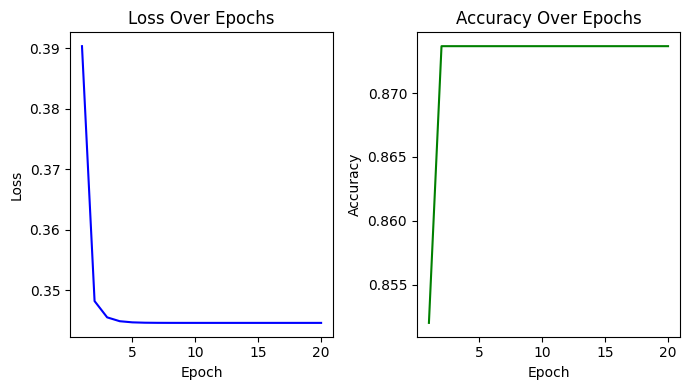

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss_history) + 1), loss_history, linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy_history) + 1), accuracy_history, linestyle='-', color='g')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')

plt.tight_layout()
plt.show()

***---> Loss function + Optimization function identification.***

Loss Function: **Cross-Entropy Loss (Binary Cross-Entropy Loss)**. In this case, "y" represents the true class label (0 or 1), and "y_pred" represents the predicted probability that the input example belongs to class 1. The cross-entropy loss measures the dissimilarity between the true labels and the predicted probabilities. It is commonly used as a loss function for binary classification problems, just as this one.

Optimization Function: **Gradient Descent**. Is an iterative optimization algorithm that aims to minimize the loss function by adjusting the model parameters (weights and bias) in the direction of steepest descent of the loss. In this case, is used because it updates the model's parameters for each training example; here, "dw" represents the gradient of the loss with respect to the weights, and "db" represents the gradient with respect to the bias.